<h1 style="text-align:center; font-size:200%;">Lab 2</h1>
<h1 style="text-align:center; font-size:150%;">Bill Generation</h1>
<h4 style="text-align:left;">Performed by: DAGHMOUMI Marouan</h4>
<h4 style="text-align:left;">Supervised by: AACHAK Lotfi</h4>


# *Part 1: Rule Based NLP and Regex:*



### 1.**Importation des biblio**



In [1]:
from word2number import w2n
from tabulate import tabulate
import re
from nltk.corpus import stopwords
import spacy



### 2.**Declaration**



In [2]:
numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen', 'twenty', 'thirty', 'forty', 'fifty', 'sixty', 'seventy', 'eighty', 'ninety', 'hundred', 'thousand', 'million']
pattern = r"((?:" + '|'.join(numbers) + r"|\d)(?:\s(?:" + '|'.join(numbers) + r"|\d|and))*)(.*?)(\d+[\.|\,]?\d*)\b\s*(\$|dollar)"

In [3]:
text = "I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a kilogram and one Hamburger with 4,5 dollar "



### 3.**NLP pipline**



In [4]:
# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Tokenize the text
word_tokens = nlp(text)

# Filter out tokens that are not stop words or adjectives
filtered_tokens = [token.text for token in word_tokens if token.pos_ != "ADJ"]

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stop words
filtered_tokens = [token for token in filtered_tokens if token.lower() not in stop_words]
filtered_tokens = ' '.join(filtered_tokens)

# Define regex pattern to match weight units and words ending with "gram" or "grams"
weight_units_regex = r'\b(?:kg|kilos|lb|pound|[\w]*(?:gram|grams))\b'
filtered_tokens = re.sub(weight_units_regex, '', filtered_tokens)

### 4.**Rule based**


In [5]:
matches = re.finditer(pattern, filtered_tokens)

# Initialize lists to store data for each column
products = []
quantities = []
unit_prices = []
total_prices = []

# Process each match
for match in matches:
    quantity = match.group(1)
    # Remove commas from the quantity string and convert it to a number
    quantity = w2n.word_to_num(quantity.replace(',', '.'))
    product = match.group(2)
    price = float(match.group(3).replace(',', '.'))  # Remove commas from the price string
    
    # Calculate total price
    total_price = quantity * price
    
    products.append(product)
    quantities.append(quantity)
    unit_prices.append(price)
    total_prices.append(total_price)

bill_data = list(zip(products, quantities, unit_prices, total_prices))

### 5.**Resultat**


In [6]:
bill_data

[(' Samsung smartphones ', 3, 150.0, 450.0),
 ('  banana ', 4, 1.2, 4.8),
 (' Hamburger ', 1, 4.5, 4.5)]

# *Part 2: word Embedding*

* import data

In [7]:
import pymongo
# Connect to MongoDB
client = pymongo.MongoClient('localhost', 27017)
db = client['Atelier1']
collection = db['News_data']

# Fetch content from MongoDB
cursor = collection.find()
content_list = []

In [8]:
count = 0
# Assuming you have already defined the 'cursor' object
for document in cursor:
    if count >= 1:
        break  # Exit the loop if we've processed two contents
    content = document.get('content')
    content_list.append(content)
    count += 1

In [9]:
print(content)

بعد يوم واحد من مطالبة منظمة العفو الدولية، السلطات الإسرائيلية بالإفراج عن السجين الفلسطيني وليد دقة البالغ من العمر 62 عاماً، أعلن نادي الأسير الفلسطيني عن وفاة وليد داخل السجن متأثراً بإصابته بمرض السرطان. وقالت منظمة العفو الدولية إن وليد دقة مصاب بـ"مرض عضال"، إذ شُخِّصت إصابته بسرطان النخاع الشوكي، والذي يُعَد من الحالات الطبية النادرة. ومنذ السابع من أكتوبر/تشرين الأول 2023، تعرَّض وليد دقة للتعذيب والإهانة وحُرِم من زيارات عائلته، إضافةً إلى تعرُّضه للإهمال الطبي، ونقل خلال الفترة الماضية إلى المستشفى مرتين بسبب تدهور حالته الصحية، بحسب منظمة العفو الدولية. ويقضي دقة حكماً بالسجن مدة 38 عاماً، بعد اتهامه بالمشاركة "مع جماعة مسلحة اختطفت وقتلت جندياً إسرائيلياً عام 1984" وهو موشيه تمام. وتقول منظمة العفو الدولية في تقرير صدر عنها العام الماضي إنه كان من المفترض انتهاء محكومية دقة في مارس/آذار 2023، لكن حكم عليه في محكمة عسكرية عام 2018 بالسجن عامين إضافيين بتهمة محاولة تهريب هواتف نقالة إلى سجناء فلسطينيين آخرين. وأعلنت هيئة شؤون الأسرى الفلسطينية وفاة السجين الفلسطيني وليد دقة 

In [10]:
# Remove numbers from the content
content_without_numbers = re.sub(r'\d+', '', content)
print(content_without_numbers)

بعد يوم واحد من مطالبة منظمة العفو الدولية، السلطات الإسرائيلية بالإفراج عن السجين الفلسطيني وليد دقة البالغ من العمر  عاماً، أعلن نادي الأسير الفلسطيني عن وفاة وليد داخل السجن متأثراً بإصابته بمرض السرطان. وقالت منظمة العفو الدولية إن وليد دقة مصاب بـ"مرض عضال"، إذ شُخِّصت إصابته بسرطان النخاع الشوكي، والذي يُعَد من الحالات الطبية النادرة. ومنذ السابع من أكتوبر/تشرين الأول ، تعرَّض وليد دقة للتعذيب والإهانة وحُرِم من زيارات عائلته، إضافةً إلى تعرُّضه للإهمال الطبي، ونقل خلال الفترة الماضية إلى المستشفى مرتين بسبب تدهور حالته الصحية، بحسب منظمة العفو الدولية. ويقضي دقة حكماً بالسجن مدة  عاماً، بعد اتهامه بالمشاركة "مع جماعة مسلحة اختطفت وقتلت جندياً إسرائيلياً عام " وهو موشيه تمام. وتقول منظمة العفو الدولية في تقرير صدر عنها العام الماضي إنه كان من المفترض انتهاء محكومية دقة في مارس/آذار ، لكن حكم عليه في محكمة عسكرية عام  بالسجن عامين إضافيين بتهمة محاولة تهريب هواتف نقالة إلى سجناء فلسطينيين آخرين. وأعلنت هيئة شؤون الأسرى الفلسطينية وفاة السجين الفلسطيني وليد دقة في أحد المستشفيات ال

* Tokenization

In [51]:
import pyarabic.araby as araby

tokens = araby.tokenize(content_without_numbers)
sent_tokens = araby.sentence_tokenize(content_without_numbers)
print("Word tokenized list: \n", tokens)
print("Sentence tokenized list: \n", sent_tokens)

Word tokenized list: 
 ['بعد', 'يوم', 'واحد', 'من', 'مطالبة', 'منظمة', 'العفو', 'الدولية', '،', 'السلطات', 'الإسرائيلية', 'بالإفراج', 'عن', 'السجين', 'الفلسطيني', 'وليد', 'دقة', 'البالغ', 'من', 'العمر', 'عاماً', '،', 'أعلن', 'نادي', 'الأسير', 'الفلسطيني', 'عن', 'وفاة', 'وليد', 'داخل', 'السجن', 'متأثراً', 'بإصابته', 'بمرض', 'السرطان', '.', 'وقالت', 'منظمة', 'العفو', 'الدولية', 'إن', 'وليد', 'دقة', 'مصاب', 'بـ', '"', 'مرض', 'عضال', '"،', 'إذ', 'شُخِّصت', 'إصابته', 'بسرطان', 'النخاع', 'الشوكي', '،', 'والذي', 'يُعَد', 'من', 'الحالات', 'الطبية', 'النادرة', '.', 'ومنذ', 'السابع', 'من', 'أكتوبر', '/', 'تشرين', 'الأول', '،', 'تعرَّض', 'وليد', 'دقة', 'للتعذيب', 'والإهانة', 'وحُرِم', 'من', 'زيارات', 'عائلته', '،', 'إضافةً', 'إلى', 'تعرُّضه', 'للإهمال', 'الطبي', '،', 'ونقل', 'خلال', 'الفترة', 'الماضية', 'إلى', 'المستشفى', 'مرتين', 'بسبب', 'تدهور', 'حالته', 'الصحية', '،', 'بحسب', 'منظمة', 'العفو', 'الدولية', '.', 'ويقضي', 'دقة', 'حكماً', 'بالسجن', 'مدة', 'عاماً', '،', 'بعد', 'اتهامه', 'بالمشاركة',

* Removing punctuation

In [52]:
import string
ar_punct = ''')(+`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”،.”…“–ـ”.'''
en_punct = string.punctuation
punct_lst = ar_punct + en_punct

In [53]:
tokens = [token for token in tokens if token not in punct_lst]
sent_tokens = [sent.translate(str.maketrans('', '', punct_lst)) for sent in sent_tokens]
print("Tokenized text without punctuation: \n",tokens)
print("Sentence tokenized text without punctuation: \n",sent_tokens)

Tokenized text without punctuation: 
 ['بعد', 'يوم', 'واحد', 'من', 'مطالبة', 'منظمة', 'العفو', 'الدولية', 'السلطات', 'الإسرائيلية', 'بالإفراج', 'عن', 'السجين', 'الفلسطيني', 'وليد', 'دقة', 'البالغ', 'من', 'العمر', 'عاماً', 'أعلن', 'نادي', 'الأسير', 'الفلسطيني', 'عن', 'وفاة', 'وليد', 'داخل', 'السجن', 'متأثراً', 'بإصابته', 'بمرض', 'السرطان', 'وقالت', 'منظمة', 'العفو', 'الدولية', 'إن', 'وليد', 'دقة', 'مصاب', 'بـ', 'مرض', 'عضال', '"،', 'إذ', 'شُخِّصت', 'إصابته', 'بسرطان', 'النخاع', 'الشوكي', 'والذي', 'يُعَد', 'من', 'الحالات', 'الطبية', 'النادرة', 'ومنذ', 'السابع', 'من', 'أكتوبر', 'تشرين', 'الأول', 'تعرَّض', 'وليد', 'دقة', 'للتعذيب', 'والإهانة', 'وحُرِم', 'من', 'زيارات', 'عائلته', 'إضافةً', 'إلى', 'تعرُّضه', 'للإهمال', 'الطبي', 'ونقل', 'خلال', 'الفترة', 'الماضية', 'إلى', 'المستشفى', 'مرتين', 'بسبب', 'تدهور', 'حالته', 'الصحية', 'بحسب', 'منظمة', 'العفو', 'الدولية', 'ويقضي', 'دقة', 'حكماً', 'بالسجن', 'مدة', 'عاماً', 'بعد', 'اتهامه', 'بالمشاركة', 'مع', 'جماعة', 'مسلحة', 'اختطفت', 'وقتلت', 'جنديا

* stopwords

In [54]:
stop_words = set(stopwords.words('arabic'))
print("Stop words: ",stop_words)

tokens = [word for word in tokens if word not in stop_words]
sent_tokens = [''.join([x for x in re.split(r'(\W+)', sent) if x not in stop_words]) for sent in sent_tokens]
print("Sentence tokenized text without stopwords: \n",sent_tokens)

Stop words:  {'خلا', 'ظلّ', 'وإن', 'اتخذ', 'ج', 'تعلَّم', 'أف', 'همزة', 'عند', 'إيانا', 'لوما', 'كليهما', 'ماي', 'أنشأ', 'لن', 'ولكن', 'ه', 'إياهن', 'أعطى', 'ّأيّان', 'هاتي', 'وإذا', 'طرا', 'الآن', 'أمد', 'حيثما', 'آب', 'بات', 'حجا', 'عَدَسْ', 'سبعمئة', 'لك', 'زود', 'ثلاثاء', 'صراحة', 'التي', 'كما', 'كأي', 'أبو', 'أمسى', 'أسكن', 'علًّ', 'يا', 'أي', 'تِه', 'مكانكنّ', 'فيها', 'درهم', 'أفريل', 'أ', 'شبه', 'كلّما', 'ريال', 'أهلا', 'كليكما', 'ف', 'دون', 'نحو', 'ثماني', 'حادي', 'ى', 'رجع', 'ص', 'أُفٍّ', 'سين', 'جير', 'ثلاثمئة', 'تلكما', 'لسن', 'يفعلون', 'دونك', 'هَذَيْنِ', 'ثلاثة', 'ساء', 'درى', 'لات', 'ذوا', 'عليك', 'تلقاء', 'ذو', 'د', 'هاته', 'هَاتِه', 'تحوّل', 'حمو', 'أربعمائة', 'مازال', 'ميم', 'سبعة', 'لعل', 'رأى', 'تسعون', 'ؤ', 'إياها', 'ليستا', 'بئس', 'هذين', 'ذات', 'ن', 'هَذانِ', 'كأن', 'هذي', 'هن', 'أصلا', 'كيت', 'أربعاء', 'ع', 'يفعلان', 'اثنين', 'أربع', 'أمامك', 'فلان', 'صدقا', 'كأنما', 'إياهم', 'وإذ', 'اربعين', 'صاد', 'جنيه', 'شرع', 'مما', 'كثيرا', 'طفق', 'حدَث', 'لكم', 'نون', 'سمع

* Remove '\xa0' characters

In [55]:
# Remove '\xa0' characters from 'tokens'
tokens = [token for token in stop_words if token != '\xa0']

# Remove numeric tokens and '\xa0' characters from 'sent_tokens'
cleaned_sent_tokens = []
for token in sent_tokens:
    # Remove '\xa0' characters and check if the token is not numeric
    if '\xa0' not in token and not token.isdigit():
        cleaned_sent_tokens.append(token)

print("Cleaned sentence tokens: \n", cleaned_sent_tokens)   
print("token clean list: \n", tokens)

Cleaned sentence tokens: 
 [' يوم   مطالبة منظمة العفو الدولية', 'السلطات الإسرائيلية بالإفراج  السجين الفلسطيني وليد دقة البالغ  العمر  عاماً', 'أعلن نادي الأسير الفلسطيني  وفاة وليد داخل السجن متأثراً بإصابته بمرض السرطان', 'وقالت منظمة العفو الدولية  وليد دقة مصاب بمرض عضال', ' ُِّصت إصابته بسرطان النخاع الشوكي', ' َُ  الحالات الطبية النادرة', 'ومنذ السابع  أكتوبرتشرين الأول ', 'تعرَّ وليد دقة للتعذيب والإهانة وحُِ  زيارات عائلته', 'إضافةً  تعرُّضه للإهمال الطبي', 'ونقل خلال الفترة الماضية  المستشفى مرتين بسبب تدهور حالته الصحية', 'بحسب منظمة العفو الدولية', 'ويقضي دقة حكماً بالسجن مدة  عاماً', ' اتهامه بالمشاركة  جماعة مسلحة اختطفت وقتلت جندياً إسرائيلياً عام   موشيه تمام', 'وتقول منظمة العفو الدولية  تقرير صدر عنها العام الماضي    المفترض انتهاء محكومية دقة  مارسآذار ', ' حكم   محكمة عسكرية عام  بالسجن عامين إضافيين بتهمة محاولة تهريب هواتف نقالة  سجناء فلسطينيين آخرين', 'ونقلت وكالة فرانس برس  رئيس هيئة شؤون الأسرى الفلسطينية قدورة فارس قوله  استشهاد الأسير وليد يأتي  نتيجة سياسة

* Normalization

In [56]:
from tashaphyne.stemming import ArabicLightStemmer

ArListem = ArabicLightStemmer()

# Normalization
cleaned_sent_tokens = [ArListem.normalize(token) for token in cleaned_sent_tokens]

print("Cleaned sentence tokens: \n", cleaned_sent_tokens) 

Cleaned sentence tokens: 
 [' يوم   مطالبه منظمه العفو الدوليه', 'السلطات الاسراءيليه بالافراج  السجين الفلسطيني وليد دقه البالغ  العمر  عاما', 'اعلن نادي الاسير الفلسطيني  وفاه وليد داخل السجن متاثرا باصابته بمرض السرطان', 'وقالت منظمه العفو الدوليه  وليد دقه مصاب بمرض عضال', ' صت اصابته بسرطان النخاع الشوكي', '   الحالات الطبيه النادره', 'ومنذ السابع  اكتوبرتشرين الاول ', 'تعر وليد دقه للتعذيب والاهانه وح  زيارات عاءلته', 'اضافه  تعرضه للاهمال الطبي', 'ونقل خلال الفتره الماضيه  المستشفي مرتين بسبب تدهور حالته الصحيه', 'بحسب منظمه العفو الدوليه', 'ويقضي دقه حكما بالسجن مده  عاما', ' اتهامه بالمشاركه  جماعه مسلحه اختطفت وقتلت جنديا اسراءيليا عام   موشيه تمام', 'وتقول منظمه العفو الدوليه  تقرير صدر عنها العام الماضي    المفترض انتهاء محكوميه دقه  مارساذار ', ' حكم   محكمه عسكريه عام  بالسجن عامين اضافيين بتهمه محاوله تهريب هواتف نقاله  سجناء فلسطينيين اخرين', 'ونقلت وكاله فرانس برس  رءيس هيءه شءون الاسري الفلسطينيه قدوره فارس قوله  استشهاد الاسير وليد ياتي  نتيجه سياسه الاهمال الطبي  تم

* Stemming

In [57]:
stemmed_tokens = [ArListem.light_stem(token) for token in tokens]
print("Stemmed token list: ", stemmed_tokens)

Stemmed token list:  ['خلا', 'ظل', 'إن', 'تخذ', 'ج', 'علم', 'أف', 'همز', 'عند', 'إيانا', 'لوما', 'كليهما', 'ما', 'أنشأ', 'لن', 'لكن', 'ه', 'إياهن', 'عطى', 'أيان', 'هاتي', 'إذا', 'طر', 'الآن', 'أمد', 'حيثما', 'آب', 'بات', 'حج', 'عدس', 'سبعمئ', 'لك', 'زود', 'ثلاثاء', 'صراح', 'التي', 'كما', 'كأي', 'أبو', 'أمسى', 'سك', 'عل', 'يا', 'أي', 'ته', 'مكانكن', 'في', 'در', 'ريل', 'أ', 'شبه', 'لما', 'ريال', 'هل', 'كليكما', 'ف', 'دون', 'نحو', 'ثم', 'حاد', 'ى', 'رجع', 'ص', 'ف', 'سي', 'جير', 'ثلاثمئ', 'تلكما', 'لسن', 'فعل', 'دونك', 'هذين', 'ثلاث', 'ساء', 'درى', 'لات', 'ذوا', 'على', 'تلقاء', 'ذو', 'د', 'هاته', 'هاته', 'حول', 'حمو', 'ربعمائ', 'مازال', 'ميم', 'سبع', 'لعل', 'رأى', 'سع', 'ؤ', 'إياها', 'ليستا', 'بئس', 'هذين', 'ذات', 'ن', 'هذان', 'أن', 'هذي', 'هن', 'أصلا', 'كيت', 'ربعاء', 'ع', 'فعل', 'ثني', 'ربع', 'أمام', 'فلان', 'صدق', 'كأنما', 'إياهم', 'إذ', 'ربعي', 'صاد', 'جن', 'شرع', 'مما', 'ثيرا', 'طفق', 'حدث', 'لكم', 'ون', 'سمع', 'آه', 'غي', 'طاق', 'حاي', 'كذا', 'نت', 'س', 'علم', 'لا', 'هيا', 'ضا', 'غ',

* Lemmatization

In [58]:
import qalsadi.lemmatizer as lem
lemmer = lem.Lemmatizer()
lemmatized_tokens = [lemmer.lemmatize(token) for token in tokens]
print("Lemmatized token list: ", lemmatized_tokens)

Lemmatized token list:  ['خلا', 'ظل', 'إن', 'اتخذ', 'ج', 'تعلم', 'أف', 'همزة', 'عند', 'إيانا', 'لوما', 'كليهما', 'ما', 'أنشأ', 'لن', 'لكن', 'ه', 'إياهن', 'أعطى', 'أيان', 'هاتي', 'إذا', 'طر', 'الآن', 'أمد', 'حيثما', 'آب', 'بات', 'حج', 'عدس', 'سبعمئة', 'لك', 'زود', 'ثلاثاء', 'صراح', 'التي', 'كما', 'أي', 'أبو', 'أمسى', 'أس', 'عل', 'يا', 'أي', 'تاه', 'مكان', 'في', 'در', 'ريل', 'أ', 'شبه', 'كلم', 'ريال', 'هل', 'كليكما', 'ف', 'دون', 'نحو', 'ثم', 'حاد', 'ى', 'رجع', 'ص', 'أف', 'وسى', 'جير', 'ثلاثمئة', 'تلكما', 'لسن', 'فعل', 'دونك', 'هذين', 'ثلاثة', 'ساء', 'درى', 'لات', 'ذوا', 'على', 'تلقاء', 'ذو', 'د', 'هاته', 'ها', 'تحول', 'حمو', 'أربعمائة', 'مازال', 'ميم', 'سبع', 'لعل', 'رأى', 'سعى', 'ؤ', 'إياها', 'ليستا', 'بئس', 'هذين', 'ذات', 'ن', 'هذان', 'أن', 'هذي', 'هن', 'أصلا', 'كيت', 'أربعاء', 'ع', 'فعل', 'ثنى', 'ربع', 'أمام', 'فلان', 'صدق', 'كأنما', 'إياهم', 'إذ', 'اربعين', 'صاد', 'جن', 'شرع', 'مما', 'كثير', 'طفق', 'حدث', 'لكم', 'نون', 'سمع', 'آه', 'غين', 'طاق', 'حاي', 'ذا', 'آن', 'س', 'علم', 'كل', '

* Create vocabulary

In [59]:
# Create the vocabulary
vocab = {}
count = 0
for sent in tokens:
    for word in sent.split():
        if word not in vocab:
            count = count + 1
            vocab[word] = count
print('vocabulary :', vocab)

vocabulary : {'خلا': 1, 'ظلّ': 2, 'وإن': 3, 'اتخذ': 4, 'ج': 5, 'تعلَّم': 6, 'أف': 7, 'همزة': 8, 'عند': 9, 'إيانا': 10, 'لوما': 11, 'كليهما': 12, 'ماي': 13, 'أنشأ': 14, 'لن': 15, 'ولكن': 16, 'ه': 17, 'إياهن': 18, 'أعطى': 19, 'ّأيّان': 20, 'هاتي': 21, 'وإذا': 22, 'طرا': 23, 'الآن': 24, 'أمد': 25, 'حيثما': 26, 'آب': 27, 'بات': 28, 'حجا': 29, 'عَدَسْ': 30, 'سبعمئة': 31, 'لك': 32, 'زود': 33, 'ثلاثاء': 34, 'صراحة': 35, 'التي': 36, 'كما': 37, 'كأي': 38, 'أبو': 39, 'أمسى': 40, 'أسكن': 41, 'علًّ': 42, 'يا': 43, 'أي': 44, 'تِه': 45, 'مكانكنّ': 46, 'فيها': 47, 'درهم': 48, 'أفريل': 49, 'أ': 50, 'شبه': 51, 'كلّما': 52, 'ريال': 53, 'أهلا': 54, 'كليكما': 55, 'ف': 56, 'دون': 57, 'نحو': 58, 'ثماني': 59, 'حادي': 60, 'ى': 61, 'رجع': 62, 'ص': 63, 'أُفٍّ': 64, 'سين': 65, 'جير': 66, 'ثلاثمئة': 67, 'تلكما': 68, 'لسن': 69, 'يفعلون': 70, 'دونك': 71, 'هَذَيْنِ': 72, 'ثلاثة': 73, 'ساء': 74, 'درى': 75, 'لات': 76, 'ذوا': 77, 'عليك': 78, 'تلقاء': 79, 'ذو': 80, 'د': 81, 'هاته': 82, 'هَاتِه': 83, 'تحوّل': 84, 'حمو': 

* One Hot Encoding

In [63]:
import numpy as np

# One Hot Encoding
def OneHotEncoder(text):
    onehot_encoded = []
    for word in text.split():
        temp = [0]*len(vocab)
        if word in vocab:
            temp[vocab[word]-1] = 1
            onehot_encoded.append(temp)
    return onehot_encoded

# Example usage
one_hot_encoded_array = np.array(OneHotEncoder(tokens[0]))
print("One-hot encoded array:")
print(one_hot_encoded_array)


One-hot encoded array:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0

* apply One Hot Encoding to all sentences

In [69]:
# Tokenize each sentence into words
tokenized_sentences = [sentence.split() for sentence in cleaned_sent_tokens]

# Create a vocabulary list
vocabulary = set(word for sentence in tokenized_sentences for word in sentence)

# Assign a unique index to each word in the vocabulary
word_to_index = {word: idx for idx, word in enumerate(vocabulary)}

# Function to encode a sentence into a one-hot vector
def one_hot_encode(sentence):
    encoded_sentence = np.zeros(len(vocabulary))
    for word in sentence.split():
        if word in word_to_index:
            index = word_to_index[word]
            encoded_sentence[index] = 1
    return encoded_sentence

# Apply one-hot encoding to each sentence
one_hot_encoded_sentences = [one_hot_encode(sentence) for sentence in cleaned_sent_tokens]

# Print the one-hot encoded sentences
for i, encoded_sentence in enumerate(one_hot_encoded_sentences):
    print(f"Sentence {i + 1}:\n{encoded_sentence}\n")

Sentence 1:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sentence 2:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

* Visualate sentences

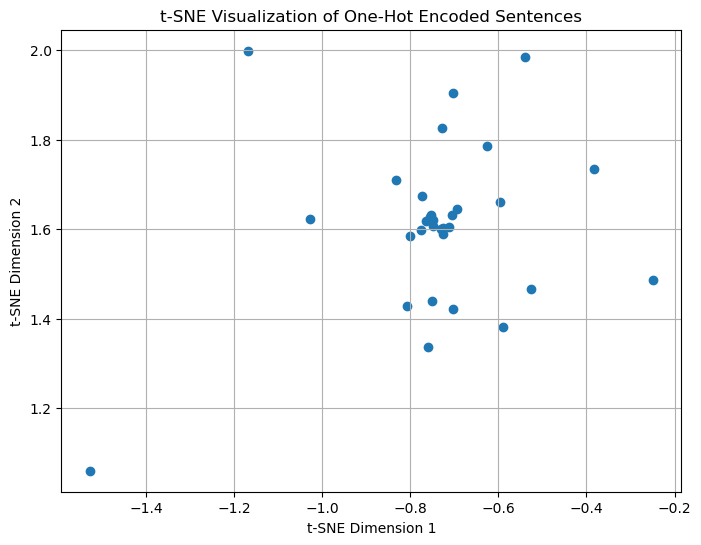

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Convert to NumPy array
X = np.array(one_hot_encoded_sentences)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plot the t-SNE embeddings
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title('t-SNE Visualization of One-Hot Encoded Sentences')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


* fit & transform each sentences as BOW representation

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer : Convert a collection of text documents to a matrix of token counts.
count_vect = CountVectorizer()

# fit & transform will represent each sentences as BOW representation
BOW = count_vect.fit_transform(cleaned_sent_tokens)

# Get the vocabulary
print("Our vocabulary: ", count_vect.vocabulary_)

Our vocabulary:  {'يوم': 250, 'مطالبه': 199, 'منظمه': 203, 'العفو': 56, 'الدوليه': 38, 'السلطات': 45, 'الاسراءيليه': 20, 'بالافراج': 85, 'السجين': 43, 'الفلسطيني': 60, 'وليد': 235, 'دقه': 132, 'البالغ': 30, 'العمر': 57, 'عاما': 157, 'اعلن': 17, 'نادي': 207, 'الاسير': 22, 'وفاه': 229, 'داخل': 130, 'السجن': 41, 'متاثرا': 184, 'باصابته': 82, 'بمرض': 95, 'السرطان': 44, 'وقالت': 231, 'مصاب': 197, 'عضال': 164, 'صت': 149, 'اصابته': 14, 'بسرطان': 93, 'النخاع': 73, 'الشوكي': 46, 'الحالات': 33, 'الطبيه': 52, 'النادره': 72, 'ومنذ': 236, 'السابع': 40, 'اكتوبرتشرين': 18, 'الاول': 28, 'تعر': 103, 'للتعذيب': 178, 'والاهانه': 218, 'وح': 223, 'زيارات': 138, 'عاءلته': 155, 'اضافه': 15, 'تعرضه': 104, 'للاهمال': 177, 'الطبي': 51, 'ونقل': 239, 'خلال': 129, 'الفتره': 59, 'الماضيه': 66, 'المستشفي': 69, 'مرتين': 190, 'بسبب': 92, 'تدهور': 100, 'حالته': 118, 'الصحيه': 50, 'بحسب': 90, 'ويقضي': 244, 'حكما': 124, 'بالسجن': 87, 'مده': 189, 'اتهامه': 3, 'بالمشاركه': 88, 'جماعه': 115, 'مسلحه': 195, 'اختطفت': 6, 'وقتل

In [73]:
#see the BOW representation
print(f"BoW representation for : {cleaned_sent_tokens[0]} {BOW[0].toarray()}")

BoW representation for :  يوم   مطالبه منظمه العفو الدوليه [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


* visualte BOW

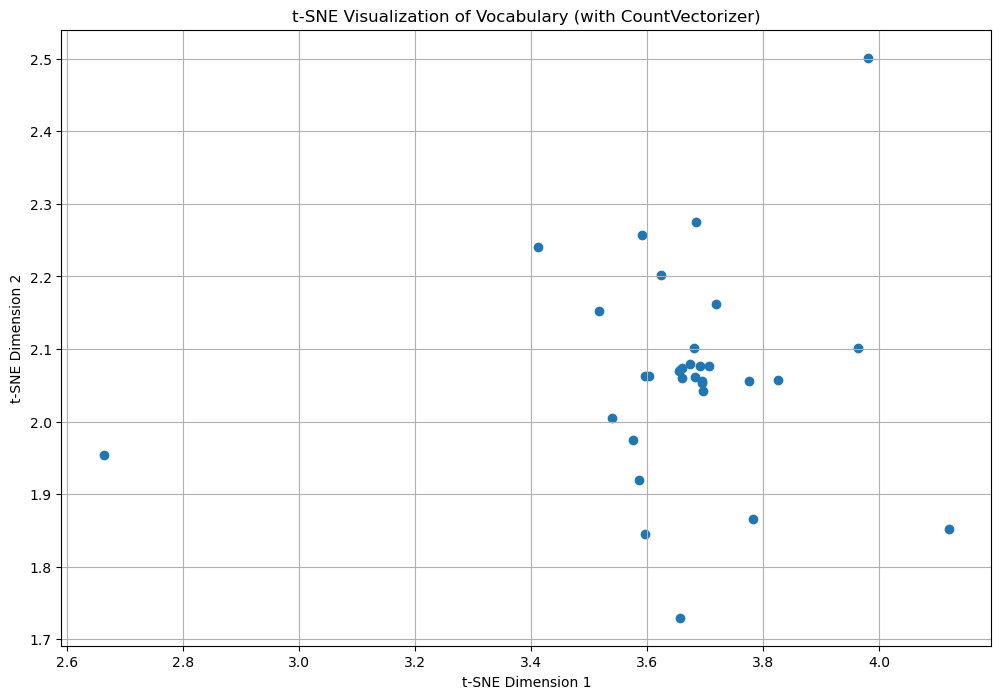

In [74]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get the count matrix
count_matrix = BOW.toarray()

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
count_matrix_embedded = tsne.fit_transform(count_matrix)

# Plot the t-SNE embeddings
plt.figure(figsize=(12, 8))
plt.scatter(count_matrix_embedded[:, 0], count_matrix_embedded[:, 1])
plt.title('t-SNE Visualization of Vocabulary (with CountVectorizer)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


* apply TF-IDF

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(cleaned_sent_tokens)

# All words in the vocabulary.
print("vocabulary", tfidf.get_feature_names_out())

vocabulary ['ابنته' 'ابنتهما' 'ابنه' 'اتهامه' 'اجراها' 'اجرت' 'اختطفت' 'اخرين'
 'ارتفع' 'استءناف' 'استشهاد' 'اسراءيل' 'اسراءيلي' 'اسراءيليا' 'اصابته'
 'اضافه' 'اضافيين' 'اعلن' 'اكتوبرتشرين' 'الاحتلال' 'الاسراءيليه' 'الاسري'
 'الاسير' 'الاعلاميه' 'الاف' 'الافراج' 'الانجاب' 'الاهمال' 'الاول'
 'الباحث' 'البالغ' 'التاريخ' 'التماس' 'الحالات' 'الحكم' 'الحمض' 'الحياه'
 'الدوله' 'الدوليه' 'الرحيم' 'السابع' 'السجن' 'السجون' 'السجين' 'السرطان'
 'السلطات' 'الشوكي' 'الشيخ' 'الصحه' 'الصحيفه' 'الصحيه' 'الطبي' 'الطبيه'
 'العام' 'العبريه' 'العربيه' 'العفو' 'العمر' 'الغربيه' 'الفتره'
 'الفلسطيني' 'الفلسطينيه' 'الفلسطينيين' 'القومي' 'الكتابه' 'الماضي'
 'الماضيه' 'المبكر' 'المتعم' 'المستشفي' 'المعتقلين' 'المفترض' 'النادره'
 'النخاع' 'النطفه' 'النور' 'النووي' 'امنها' 'انتهاء' 'اوضاع' 'ايامه'
 'ايتمار' 'باصابته' 'باقه' 'بالاعدام' 'بالافراج' 'بالانجاب' 'بالسجن'
 'بالمشاركه' 'بتهمه' 'بحسب' 'برس' 'بسبب' 'بسرطان' 'بمتابعه' 'بمرض' 'بن'
 'بيان' 'تجربه' 'تخفيف' 'تدهور' 'تسجيل' 'تسجيلها' 'تعر' 'تعرضه' 'تعني'
 'تقر

In [76]:
# IDF value for all words in the vocabulary
print("IDF for all words in the vocabulary :\n", tfidf.idf_)

IDF for all words in the vocabulary :
 [3.39789527 3.80336038 3.80336038 3.80336038 3.80336038 3.80336038
 3.80336038 3.80336038 3.80336038 3.80336038 3.80336038 3.80336038
 3.80336038 3.80336038 3.80336038 3.39789527 3.80336038 3.80336038
 3.39789527 3.39789527 2.70474809 3.80336038 3.1102132  3.80336038
 3.80336038 3.39789527 3.80336038 3.39789527 3.39789527 3.80336038
 3.80336038 3.80336038 3.80336038 3.80336038 3.39789527 3.80336038
 3.80336038 3.80336038 2.88706965 3.80336038 3.39789527 3.39789527
 3.39789527 3.80336038 3.39789527 3.39789527 3.80336038 3.39789527
 3.80336038 3.80336038 3.39789527 3.1102132  3.80336038 3.80336038
 3.80336038 3.80336038 2.88706965 3.80336038 3.80336038 3.80336038
 2.88706965 3.80336038 3.80336038 3.80336038 3.80336038 3.80336038
 3.80336038 3.39789527 3.80336038 3.80336038 3.80336038 3.80336038
 3.80336038 3.80336038 3.80336038 3.80336038 3.80336038 3.80336038
 3.80336038 3.80336038 3.80336038 3.80336038 3.80336038 3.80336038
 3.80336038 3.80336038 

* Visualate TF-IDF

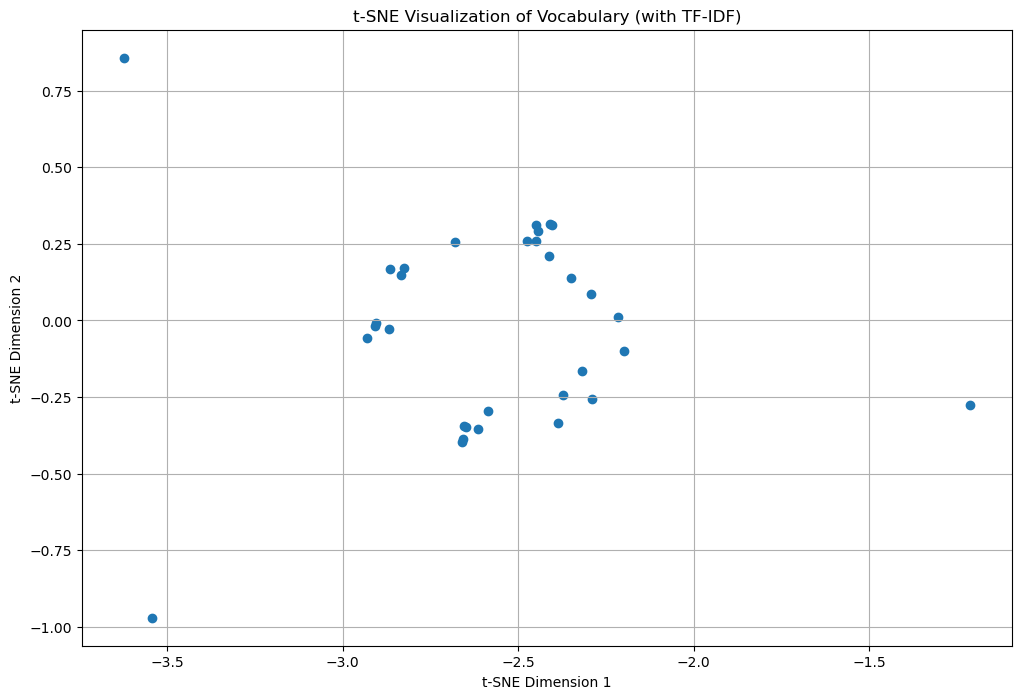

In [77]:
# Get the TF-IDF matrix
tfidf_matrix = tfidf_matrix.toarray()

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tfidf_matrix_embedded = tsne.fit_transform(tfidf_matrix)

# Plot the t-SNE embeddings
plt.figure(figsize=(12, 8))
plt.scatter(tfidf_matrix_embedded[:, 0], tfidf_matrix_embedded[:, 1])
plt.title('t-SNE Visualization of Vocabulary (with TF-IDF)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


In [79]:
# TFIDF representation for the first document in our corpus
print('\nTFIDF representation for "{}" is \n{}'.format(cleaned_sent_tokens[0], tfidf_matrix[0]))


TFIDF representation for " يوم   مطالبه منظمه العفو الدوليه" is 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.3931112  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.3931112  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

In [80]:
import pyarabic.araby as araby

tokens = araby.tokenize(cleaned_sent_tokens[0])
print("Word tokenized list: \n", tokens)

Word tokenized list: 
 ['يوم', 'مطالبه', 'منظمه', 'العفو', 'الدوليه']


In [81]:
id_to_word = {i:x for (i, x) in enumerate(tokens)}
word_to_id = {x:i for (i, x) in enumerate(tokens)}
print("word_to_id :")
print(word_to_id)
print("id_to_word :")
print(id_to_word)

word_to_id :
{'يوم': 0, 'مطالبه': 1, 'منظمه': 2, 'العفو': 3, 'الدوليه': 4}
id_to_word :
{0: 'يوم', 1: 'مطالبه', 2: 'منظمه', 3: 'العفو', 4: 'الدوليه'}


In [82]:
def generate_training_data(tokens, word_to_id, window_size):
 X, Y = [], []
 for i in range(len(tokens)):
  nbr_inds = list(range(max(0, i - window_size), i)) + \
  list(range(i + 1, min(len(tokens), i + window_size + 1)))
  for j in nbr_inds:
   X.append(word_to_id[tokens[i]])
   Y.append(word_to_id[tokens[j]])
 return np.array(X), np.array(Y)
x, y = generate_training_data(tokens, word_to_id, 3)
print("training data :")
print(x)
print(y)

training data :
[0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4]
[1 2 3 0 2 3 4 0 1 3 4 0 1 2 4 1 2 3]


In [85]:
def expand_dims(x, y):
 x = np.expand_dims(x, axis=0)
 y = np.expand_dims(y, axis=0)
 return x, y
x, y = expand_dims(x, y)
print("Expand dimensions :")
print(x)
print(y)

Expand dimensions :
[[0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4]]
[[1 2 3 0 2 3 4 0 1 3 4 0 1 2 4 1 2 3]]


In [86]:
# forward propagation
def init_parameters(vocab_size, emb_size):
 wrd_emb = np.random.randn(vocab_size, emb_size) * 0.01
 w = np.random.randn(vocab_size, emb_size) * 0.01
 return wrd_emb, w

def softmax(z):
 return np.divide(np.exp(z), np.sum(np.exp(z), axis=0, keepdims=True) + 0.001)

def forward(inds, params):
 wrd_emb, w = params
 word_vec = wrd_emb[inds.flatten(), :].T
 z = np.dot(w, word_vec)
 out = softmax(z)
 cache = inds, word_vec, w, z
 return out, cache

In [87]:
# cost funtion
def cross_entropy(y, y_hat):
 m = y.shape[1]
 cost = -(1 / m) * np.sum(np.sum(y_hat * np.log(y + 0.001), axis=0, keepdims=True), axis=1)
 return cost

# dervation of softmax
def dsoftmax(y, out):
 dl_dz = out - y
 return dl_dz

In [88]:
def backward(y, out, cache):
 inds, word_vec, w, z = cache
 wrd_emb, w = params
 dl_dz = dsoftmax(y, out)
 # deviding by the word_vec length to find the average
 dl_dw = (1/word_vec.shape[1]) * np.dot(dl_dz, word_vec.T)
 dl_dword_vec = np.dot(w.T, dl_dz)
 return dl_dz, dl_dw, dl_dword_vec

def update(params, cache, grads, lr=0.03):
 inds, word_vec, w, z = cache
 wrd_emb, w = params
 dl_dz, dl_dw, dl_dword_vec = grads
 wrd_emb[inds.flatten(), :] -= dl_dword_vec.T * lr
 w -= dl_dw * lr
 return wrd_emb, w

In [89]:
# training
vocab_size = len(id_to_word)
m = y.shape[1]
y_one_hot = np.zeros((vocab_size, m))
y_one_hot[y.flatten(), np.arange(m)] = 1
y = y_one_hot
batch_size=256
embed_size = 50
params = init_parameters(vocab_size, 50)
costs = []
for epoch in range(5000):
 epoch_cost = 0
 batch_inds = list(range(0, x.shape[1], batch_size))
 np.random.shuffle(batch_inds)
 for i in batch_inds:
  x_batch = x[:, i:i+batch_size]
  y_batch = y[:, i:i+batch_size]
  pred, cache = forward(x_batch, params)
  grads = backward(y_batch, pred, cache)
  params = update(params, cache, grads, 0.03)
  cost = cross_entropy(pred, y_batch)
  epoch_cost += np.squeeze(cost)
 costs.append(epoch_cost)
 if(epoch % 250 == 0):
  print("Cost after epoch {}: {}".format(epoch, epoch_cost))

Cost after epoch 0: 1.6043636852953078
Cost after epoch 250: 1.5590601669936657
Cost after epoch 500: 1.5152891100394852
Cost after epoch 750: 1.500810450828572
Cost after epoch 1000: 1.5041539510225677
Cost after epoch 1250: 1.5125976321122805
Cost after epoch 1500: 1.5135192200292418
Cost after epoch 1750: 1.512759486823016
Cost after epoch 2000: 1.5163047019077633
Cost after epoch 2250: 1.5220707301529224
Cost after epoch 2500: 1.526775920074823
Cost after epoch 2750: 1.5294355255568046
Cost after epoch 3000: 1.530341232660008
Cost after epoch 3250: 1.5299369630179618
Cost after epoch 3500: 1.5284960267746626
Cost after epoch 3750: 1.526326623488883
Cost after epoch 4000: 1.5241317253475943
Cost after epoch 4250: 1.5228194137689581
Cost after epoch 4500: 1.5227746417691421
Cost after epoch 4750: 1.523637158952556


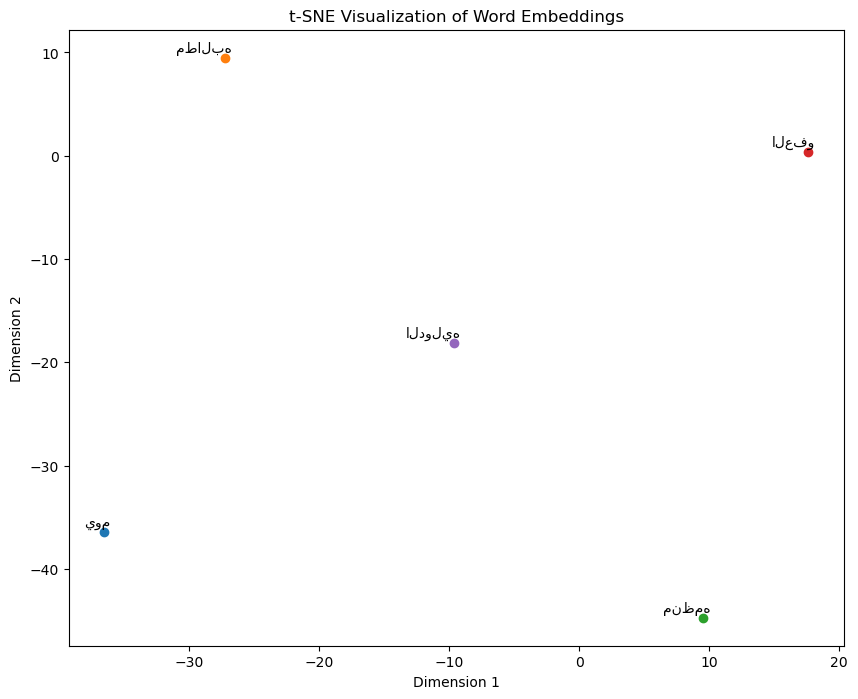

In [90]:
# Function to reduce dimensionality of embeddings with t-SNE
def reduce_dimensionality(embeddings, perplexity=30, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter)
    embeddings_2d = tsne.fit_transform(embeddings)
    return embeddings_2d

# Reduce dimensionality of word embeddings
perplexity = min(len(params[0]), len(params[0]) - 1)  # Set perplexity to the vocabulary size
word_embeddings_2d = reduce_dimensionality(params[0], perplexity=perplexity)

# Plot the embeddings
plt.figure(figsize=(10, 8))
for i, word in id_to_word.items():
    x, y = word_embeddings_2d[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [91]:
# test
x_test = np.arange(vocab_size)
x_test = np.expand_dims(x_test, axis=0)
softmax_test, _ = forward(x_test, params)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]

for input_ind in range(vocab_size):
 input_word = id_to_word[input_ind]
 output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1,
 input_ind]]
 print("{}'s skip-grams: {}".format(input_word, output_words))


يوم's skip-grams: ['العفو', 'مطالبه', 'منظمه', 'الدوليه']
مطالبه's skip-grams: ['الدوليه', 'يوم', 'منظمه', 'العفو']
منظمه's skip-grams: ['الدوليه', 'يوم', 'مطالبه', 'العفو']
العفو's skip-grams: ['الدوليه', 'يوم', 'مطالبه', 'منظمه']
الدوليه's skip-grams: ['العفو', 'مطالبه', 'منظمه', 'الدوليه']


In [96]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Create the tokenizer and fit it on your tokens
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokens)
# number of unique words in dict.
print("Number of unique words in dictionary=",
len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)


Number of unique words in dictionary= 5
Dictionary is =  {'يوم': 1, 'مطالبه': 2, 'منظمه': 3, 'العفو': 4, 'الدوليه': 5}


In [97]:
def embedding_for_vocab(filepath, word_index,
embedding_dim):
    vocab_size = len(word_index) + 1
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,embedding_dim))
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix_vocab

In [98]:
# matrix for vocab: word_index
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab( '/Users/marouandgh/Documents/IASD/NLP/Les Ateliers/Atelier_2/path_file.txt', tokenizer.word_index,embedding_dim)
print("Dense vector for first word is => ",embedding_matrix_vocab[1])

Dense vector for first word is =>  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [104]:
import numpy as np
from gensim.models import FastText

# Train FastText model on the filtered words
model = FastText(sentences=[lemmatized_tokens], min_count=1)


In [105]:
# Function to get word vector
def get_word_vector(word):
    # Check if word exists in vocabulary
    if word in model.wv.key_to_index:
        return model.wv[word]
    else:
        char_vectors = [model.wv[char] for char in word]
        return sum(char_vectors) / len(char_vectors)

In [106]:
# Example usage
word = "ملك"
word_vector = get_word_vector(word)
word_vector_array = np.array(word_vector)  # Convert list to array
print("Word vector for", word, ":", word_vector_array)

# Find similar words
similar_words = model.wv.most_similar(positive=[word], topn=2)
similar_words_array = np.array(similar_words)  # Convert list of tuples to array
print("Similar words to", word, ":", similar_words_array)

Word vector for ملك : [ 5.1297224e-03  1.2128359e-03 -7.0460759e-05  1.5947189e-03
  1.3425461e-03 -9.9920049e-05  2.5743619e-05 -5.7781409e-03
  7.6543697e-04 -2.8291561e-03  9.2721544e-04  7.4164820e-04
 -2.8831995e-04 -3.0112671e-04 -4.1176489e-05  2.1796452e-04
  5.9823133e-04  1.5600253e-03 -6.2674354e-03 -2.3345568e-03
 -5.0406787e-03 -4.0664286e-03  3.9944085e-03  1.6397020e-03
 -9.9030521e-04  1.2399167e-03 -5.0209141e-03  1.5933608e-03
 -2.6949793e-03 -2.6372094e-03  4.1007911e-04  1.8518046e-04
  4.0650070e-03  1.2891884e-03  4.6644616e-03  9.5797848e-04
  4.9168896e-04  4.9752626e-03  1.8851835e-03  9.8975061e-04
  3.1756635e-03 -1.2943213e-03  9.3121751e-04  2.9985793e-03
  9.9471759e-04 -2.3457282e-03  1.7648052e-03 -2.2076180e-03
  2.5907450e-03  4.1032978e-03 -1.3583010e-03 -1.5642736e-03
  1.0618925e-03 -1.1657696e-03 -3.1962683e-03  6.8625994e-04
  2.3720826e-03 -1.8082826e-03  2.8198401e-03 -6.0332404e-04
  6.6256587e-04 -1.2840079e-04  2.7868866e-03 -5.2442779e-03
 -

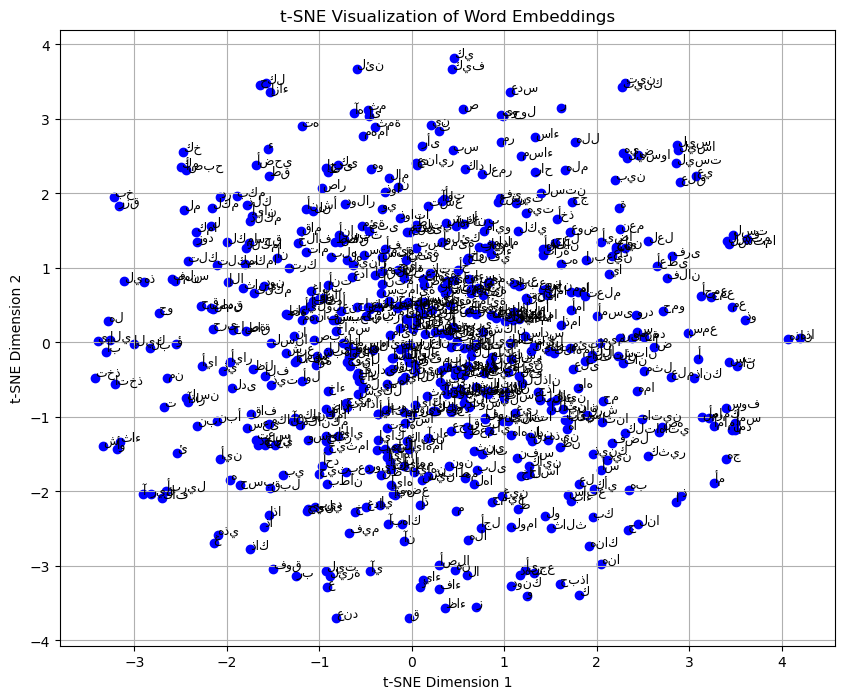

In [108]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get all word vectors from the model
all_word_vectors_matrix = model.wv.vectors

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(all_word_vectors_matrix)

# Plot the word vectors
plt.figure(figsize=(10, 8))
for i, word in enumerate(model.wv.index_to_key):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], marker='o', color='blue')
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word, fontsize=9)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings')
plt.grid(True)
plt.show()

#  Reference

[stackoverflow_link]: https://stackoverflow.com/questions/75526388/how-to-use-arabic-in-word2vec " title"
[medium_link]: https://medium.com/@WaadTSS/how-to-use-arabic-word2vec-word-embedding-with-lstm-af93858b2ce " Homepage"
[github_link]: https://github.com/topics/arabic-nlp "github repostory"

How to Use Arabic Word2Vec Word Embedding with LSTM for Sentiment Analysis Task [medium_link].
how to use Arabic in word2vec? [stackoverflow_link].
some github repositories [github_link].

